# Projet Gestion de Portefeuille

# Part1: Gaussian framework parametric method

In [34]:
#imports

#Imports

%pylab inline

import pandas as pd

from scipy.stats import norm

import statsmodels.api as sm

from scipy import stats


Populating the interactive namespace from numpy and matplotlib


C:\Users\louis\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Data importation and visualization

In [7]:
#Datasets

stocks5=pd.read_csv('data_TP_session2.csv')

#Verification

#print(dax30[1:10][1:])
stocks5.tail()
#looks working

,Date,DPW.DE,ALV.DE,BMW.DE,BAS.DE,FME.DE
250,2017-12-21,40.705002,196.250000,87.839996,93.690002,87.410004
251,2017-12-22,40.494999,195.250000,87.519997,93.510002,88.230003
252,2017-12-27,40.610001,194.100006,87.260002,93.589996,88.389999
253,2017-12-28,40.134998,193.250000,87.139999,92.779999,88.169998
254,2017-12-29,39.750000,191.500000,86.830002,91.739998,87.779999


## Daily Returns

[ 0.00084514 -0.00141051  0.00247986  0.00050226]


Text(0,0.5,'daily returns')

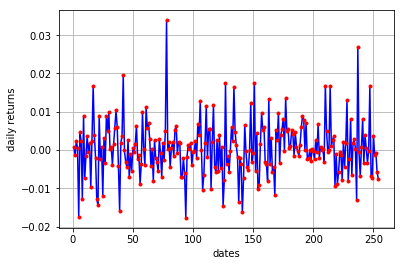

In [68]:
daily_returns=[]#the vector of the portfolio

portfolio=['DPW.DE','ALV.DE','BMW.DE','BAS.DE','FME.DE'] #names of the columns

for e in portfolio:
    daily_returns.append(stocks5[e].pct_change()) #calculation of the daily returns
    
pi=array([1/5,1/5,1/5,1/5,1/5]) 
d_return=dot(pi,daily_returns)
print(d_return[1:5]) #verification

#Plot of the daily returns according to dates
plot(d_return,'b')
plot(d_return,'r.')
grid(True)
xlabel('dates')
ylabel('daily returns')

## Graphical tests for the normality

### Histogram fitting with a normal density

Text(0,0.5,'number of observations in %')

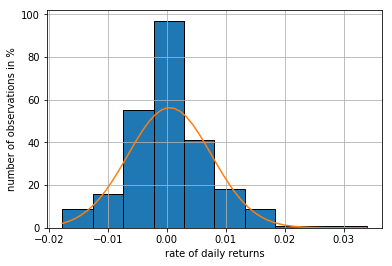

In [79]:
hist(d_return[1:],bins=10,edgecolor='black')
x=linspace(min(d_return[1:]),max(d_return[1:]))
plot(x,normpdf(x,mean(d_return[1:]),std(d_return[1:])))
grid(True)
xlabel('rate of daily returns')
ylabel('number of observations in %')

### QQ-plot

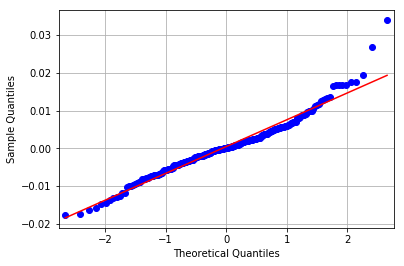

In [30]:
sm.qqplot(d_return[1:],line='s')
grid(True)

### CDF fitting with a normal cdf

Text(0,0.5,'cumulative probabilities')

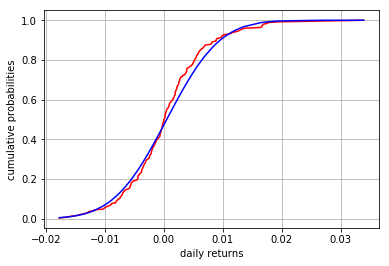

In [80]:
#values
x=sort(d_return[1:])
y=arange(1,len(x)+1)/len(x)
y2=norm.cdf((x-mean(x))/std(x))

#plot
plot(x,y,'red')
plot(x,y2,'blue')
grid(True)
xlabel('daily returns')
ylabel('cumulative probabilities')

*The QQ-plot the CDF-plots seem to fit with the normal law. The histogramm do not look well: too many values are focused around 0. So we do not know graphically if the data is normally distributed.*

# Berra and Jarque Test

In [82]:
print(stats.describe(d_return[1:]))

#Descriptive statistics
berraj=stats.describe(d_return[1:])

meanR=berraj[2]
varR=berraj[3]
stdR=sqrt(varR)
skewnessR=berraj[4]
kurtosisR=berraj[5]

print(stdR)
#Berra and Jarque test
n=len(d_return[1:])
test=(n/6)*(skewnessR**2)+(n/24)*(kurtosisR**2)
chi2quantile=stats.chi2.ppf(0.95,df=2)
print('The value of the Bera and Jarque test is:',test)
print(test>chi2quantils)
print('we reject the hypothesis of normality')

DescribeResult(nobs=248, minmax=(-0.017732626085653447, 0.033901377647699564), mean=0.00048870216578511658, variance=5.0426073495880763e-05, skewness=0.7162585154728321, kurtosis=2.3643404082211266)
0.00710113184611
The value of the Bera and Jarque test is: 78.96950963559846
True
we reject the hypothesis of normality


*Even if we wanted to accept the hypothesis of normality according to the previous plots; the statistical test makes us reject this hypothesis.*

## Calculation of the quantile-99%


In [91]:
print('The value at risk at 99% is: ',(norm.ppf(0.01,meanR,stdR)*100).round(3))

The value at risk at 99% is:  -1.603


# Part.2 : Bootstrap Simulation method

Soit R10 le rendement sur 10 jours.
On a: 1+R10=(1+R0_1)(1+R1_2)...(1+R9_10)

### Bootstrap

In [88]:
returnportfolio=[]
d_return=d_return[1:]
for i in range(10000):
    alea_tmp=random.choice(len(d_return),10)#sample with replacement
    tmp=1
    for j in range(10):
        tmp*=(1+d_return[alea_tmp[j]])#applying the function to get the return over 10 days according to the returns per day
    returnportfolio.append(tmp-1)
print(returnportfolio[:5]) #verification

[0.029296919203694705, 0.019879930730922979, 0.027350779312097506, 0.016249246728254674, 0.018892091493424301]


### Calcul de Var99%

In [92]:
returnportfolio=array(returnportfolio)

print('The value at risk at 99% is: ',round(percentile(returnportfolio,1),3)*100)

The value at risk at 99% is:  -4.3
